# t-SNE

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel("data_cleaned.xlsx")
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)
data['Uspesnost'].replace({1:0, 2: 1, 3: 2}, inplace=True)

X = data.drop("Uspesnost", axis=1)
y = data["Uspesnost"]

"""X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)"""

'X = pd.DataFrame(X).to_numpy()\ny = pd.DataFrame(y).to_numpy()\n\nfrom operator import add\nfrom functools import reduce\n\ny = [reduce(add, lst) for lst in y]\ny = np.array(y)'

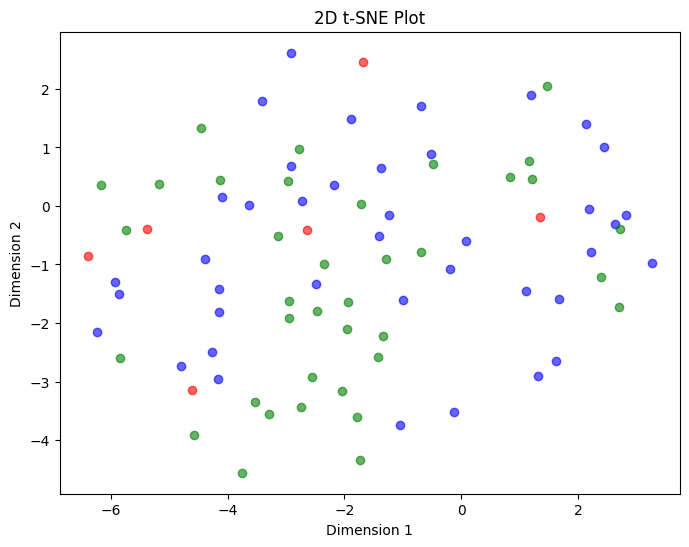

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming X contains your features and y contains your outcome variable
# Perform t-SNE on your data
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plotting 2D t-SNE graph
plt.figure(figsize=(8, 6))

# Assigning colors to different classes
colors = ['r', 'g', 'b']  # Assuming three different classes

for i in range(len(X_embedded)):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[y[i]], alpha=0.6)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D t-SNE Plot')
plt.show()

## 3D

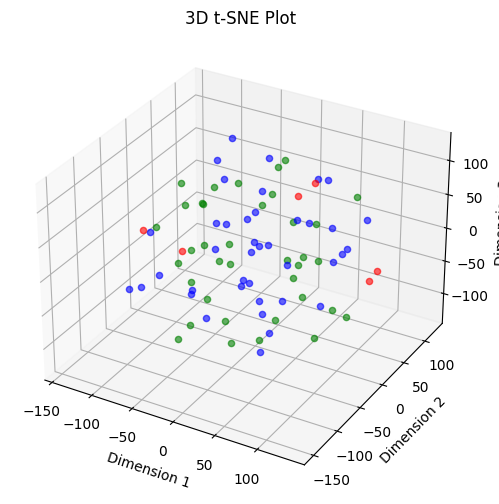

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Assuming X contains your features and y contains your outcome variable
# Perform t-SNE on your data
tsne = TSNE(n_components=3, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plotting 3D t-SNE graph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assigning colors to different classes
colors = ['r', 'g', 'b']  # Assuming three different classes

for i in range(len(X_embedded)):
    ax.scatter(X_embedded[i, 0], X_embedded[i, 1], X_embedded[i, 2], color=colors[y[i]], alpha=0.6)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D t-SNE Plot')

plt.show()